# Data analysis, cleaning, correlation

## Importing libraries and data

In [62]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re
import copy

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

# Adjust the configuration of the plots:
matplotlib.rcParams['figure.figsize'] = (12,8)

In [36]:
# Read the data
df = pd.read_csv('C:\\Users\\gdasz\\OneDrive\\SQL_Data_Analyst\\movies.csv')

In [71]:
df.shape

(7412, 16)

In [37]:
# Let's have a look at the data
df.head(-10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7654,Star Trek First Frontier,NaN,Sci-Fi,2020,"September 8, 2020 (United States)",5.7,165.0,Kenneth Smith,Keith Brooks,Robert Pralgo,United States,370000.0,NaN,An Impulsive Production,85.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0


## Checking for missing data

In [38]:
# How much of data is missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [39]:
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [40]:
df.notnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,True,False,True,True,True,True,True,True,True,True,True,True,False,False,True
7664,True,False,True,True,True,True,True,True,True,True,True,False,False,True,True
7665,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False
7666,True,False,True,True,True,False,False,True,True,True,True,True,False,False,True


## Dealing with missing values

In [42]:
# deleting rows with missing values:
df = df.dropna()

In [ ]:
#data["Gender"].fillna("No Gender", inplace = True)
# change missing values with 0
df["rating"].fillna(0, inplace = True)

In [ ]:
# data.replace(to_replace = np.nan, value = -99)
df.replace(to_replace = np.nan, value = -99)

In [58]:
# filling a missing value with the previous ones 
df["budget"] = df["budget"].fillna(method ='pad')

In [48]:
# filling a missing value with the next ones 
df["budget"].fillna(method ='bfill')

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664       58750.0
7665       58750.0
7666       15000.0
7667           NaN
Name: budget, Length: 7668, dtype: float64

In [41]:
# Using interpolate() function to fill the missing values using linear method with 'forward' movement
df["budget"] = df["budget"].interpolate(method ='linear', limit_direction ='forward')

In [10]:
# check data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Changing data type of the 'budget' column
df['budget'] = df['budget'].astype('int64')

In [12]:
# Changing data type of the 'gross' column
df['gross'] = df['gross'].astype('int64')

In [43]:
# How much of data is missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [44]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,1.350000e+08,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,8.000000e+07,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,4.018500e+07,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,1.875000e+05,413378.0,Pryor Entertainment,120.0


In [45]:
# Stripping abundant data from the 'released' column to extract a year 



# extract 4 first characters
# df['released'].astype(str).str[:4]


# extract groups having a vowel followed by any character 
#result = sr.str.extract(pat = '([aeiou].)') 


# extract groups having any capital letter followed by 'i' and any other character 
# result = sr.str.extract(pat = '([A-Z]i.)')


# result = sr.str.extract(pat ="([A-Za-z]+.)". 
# [A-Za-z] - starting with any characters, lower case and upper case
# + - following by one more character


#    r to mark my RegEx (string) as a raw string, which does not escape metacharecters. 
#    w matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also matches the underscore, _, and the dash, -.
#    d matches digits, which means 0-9.
#    s matches whitespace characters, which include the tab, new line, carriage return, and space characters.
#    S matches non-whitespace characters.
#    . matches any character except the new line character n.

# df['released'].str.extract(r'(\d){1}', expand=True)


# in this case another approach is valid (extract a group having any digit and four digits long - as a year):
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int64')

In [46]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,1.350000e+08,111105497.0,20th Century Studios,100.0,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,8.000000e+07,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,4.018500e+07,3661.0,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,1.875000e+05,413378.0,Pryor Entertainment,120.0,2020


In [47]:
# Sorting by

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

## .......................................................................................................................

In [48]:
# CAREFULLY! You may not want to do a step below as it change the way results are showned (to show all of the rows!)
#pd.set_option('display.max_rows', None)

## .......................................................................................................................

## Dropping duplicates

In [49]:
# return all duplicated rows based on column/columns names
# In this case some movie titles duplicates, probably remakes because serching by name and year returns nothing
df[df.duplicated(['name', 'year'], keep=False)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect


In [50]:
# lets see wich values are distinctive in this dataset in case of company
df['company'].drop_duplicates().sort_values(ascending=False)

# drop all duplicates
#df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2242, dtype: object

## Checking correlation

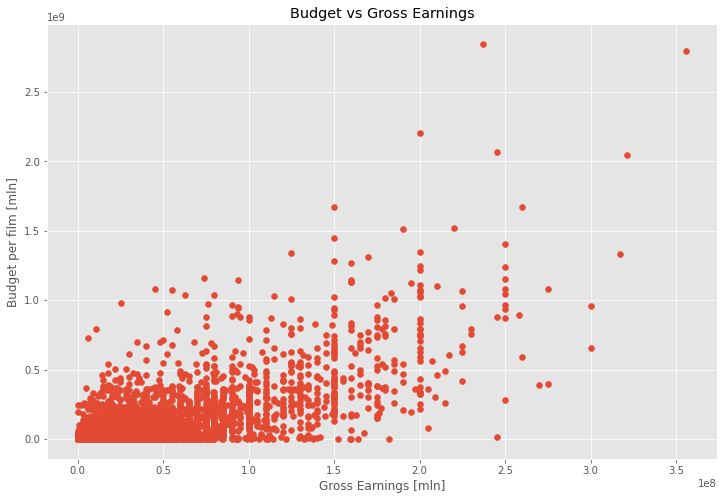

In [51]:
# Budget vs gross correlation - scatter plot

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings [mln]')
plt.ylabel('Budget per film [mln]')

plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

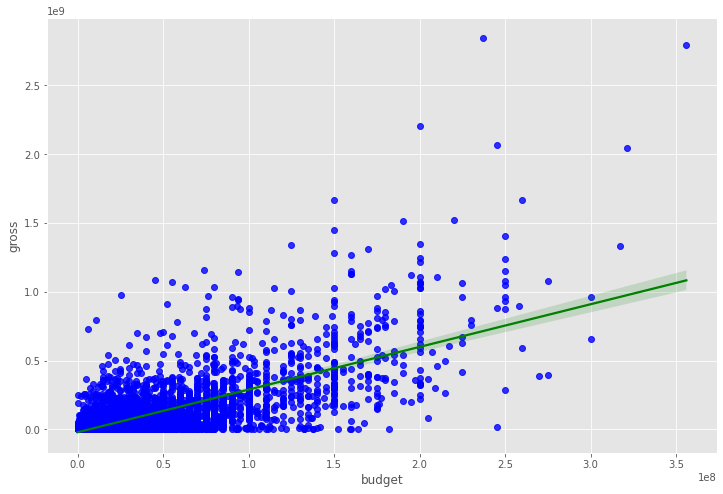

In [52]:
# Budget vs gross correlation - seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "green"})

In [53]:
# Correlation matrixes (on numerical values)

# Pearson
df.corr()
#df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.093951,0.218941,0.346245,0.258826,0.114237,0.997548
score,0.093951,1.000000,0.415190,0.079879,0.188071,0.397226,0.101308
votes,0.218941,0.415190,1.000000,0.449210,0.631110,0.309945,0.214533
budget,0.346245,0.079879,0.449210,1.000000,0.709704,0.271385,0.339323
gross,0.258826,0.188071,0.631110,0.709704,1.000000,0.245117,0.251873
runtime,0.114237,0.397226,0.309945,0.271385,0.245117,1.000000,0.113909
yearcorrect,0.997548,0.101308,0.214533,0.339323,0.251873,0.113909,1.000000


In [54]:
# Kendall
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.065343,0.326025,0.252656,0.203384,0.090236,0.988467
score,0.065343,1.000000,0.304754,0.023131,0.088522,0.282388,0.070653
votes,0.326025,0.304754,1.000000,0.339515,0.549336,0.191732,0.320699
budget,0.252656,0.023131,0.339515,1.000000,0.406470,0.194970,0.246716
gross,0.203384,0.088522,0.549336,0.406470,1.000000,0.169083,0.193571
runtime,0.090236,0.282388,0.191732,0.194970,0.169083,1.000000,0.090091
yearcorrect,0.988467,0.070653,0.320699,0.246716,0.193571,0.090091,1.000000


In [55]:
# Spearman
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.095848,0.465166,0.356751,0.297499,0.133069,0.997512
score,0.095848,1.000000,0.434803,0.033561,0.129759,0.398280,0.103706
votes,0.465166,0.434803,1.000000,0.483469,0.743122,0.281526,0.458303
budget,0.356751,0.033561,0.483469,1.000000,0.563767,0.281579,0.348614
gross,0.297499,0.129759,0.743122,0.563767,1.000000,0.246503,0.283119
runtime,0.133069,0.398280,0.281526,0.281579,0.246503,1.000000,0.133020
yearcorrect,0.997512,0.103706,0.458303,0.348614,0.283119,0.133020,1.000000


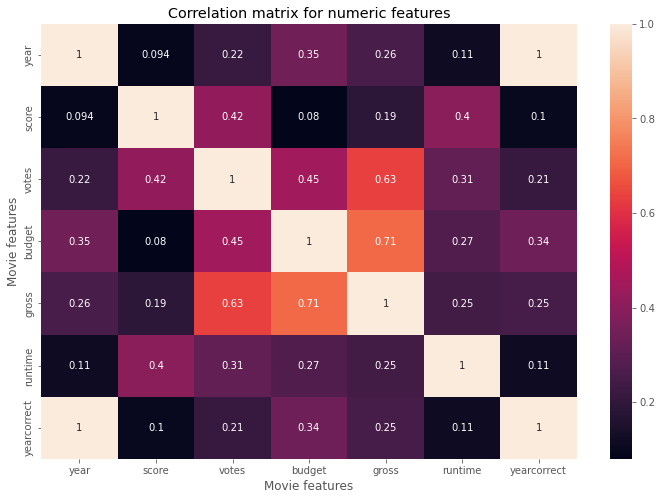

In [56]:
# Visualizing high correlation in correlation matrixe 
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

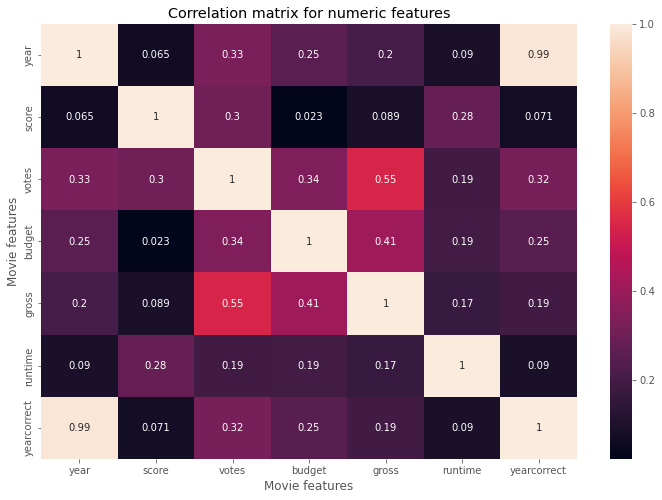

In [57]:
correlation_matrix = df.corr(method = 'kendall')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

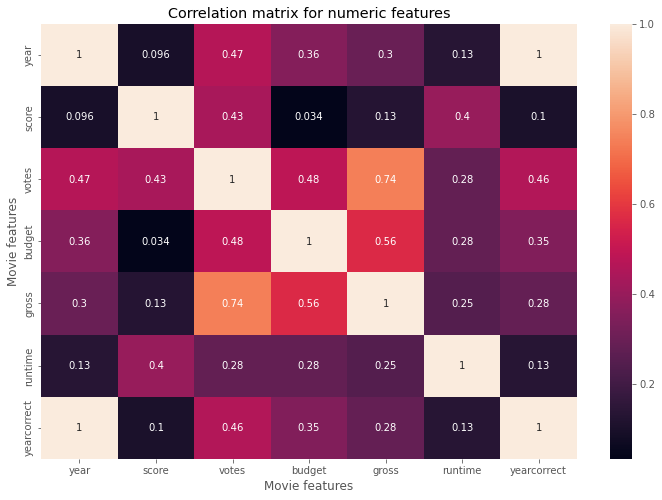

In [58]:
correlation_matrix = df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [59]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [60]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int64
dtype: object

In [63]:
# Company vs gross correlation (company is not numeric)
# lets encode company names as numeric values

df_numerized = copy.deepcopy(df)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,515,5,0,2009,678,7.8,1100000.0,1107,1705,2198,53,237000000.0,2.847246e+09,2115,162.0,2009
7445,517,5,0,2019,176,8.4,903000.0,160,708,2107,53,356000000.0,2.797501e+09,1508,181.0,2019
3045,6668,5,6,1997,686,7.8,1100000.0,1107,1705,1502,53,200000000.0,2.201647e+09,2115,194.0,1997
6663,4958,5,0,2015,680,7.8,876000.0,1077,2448,494,53,245000000.0,2.069522e+09,1446,138.0,2015
7244,518,5,0,2018,185,8.4,897000.0,160,708,2107,53,321000000.0,2.048360e+09,1508,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2592,6,5,1998,2926,6.1,2900.0,1866,1222,2032,52,31000000.0,1.672000e+03,1755,87.0,1998
2906,4234,3,5,1996,510,7.4,37000.0,1959,1878,1419,11,14500000.0,1.605000e+03,319,110.0,1996
3818,3237,6,4,2000,1085,6.5,5200.0,705,1072,2183,52,22500000.0,1.400000e+03,451,103.0,2001
7580,4491,3,5,2019,1780,5.2,735.0,1391,2117,2143,53,17250000.0,6.820000e+02,1869,93.0,2020


In [64]:
#df.dtypes

In [65]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,31000000.0,1.672000e+03,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,14500000.0,1.605000e+03,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,22500000.0,1.400000e+03,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,17250000.0,6.820000e+02,Roxwell Films,93.0,2020


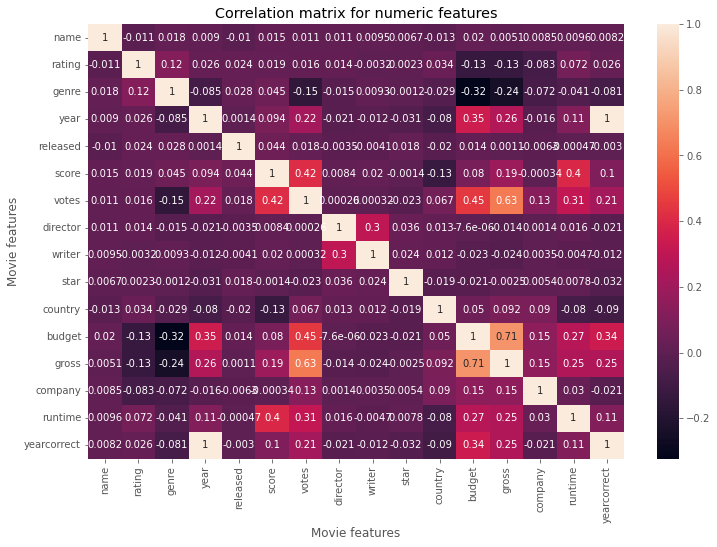

In [67]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()

In [76]:
pd.set_option('display.max_rows', 30)

In [78]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.010815,0.018363,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.020061,0.005135,0.008529,0.009563,0.008209
rating,-0.010815,1.000000,0.118600,0.025950,0.024188,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.132278,-0.131786,-0.083083,0.072340,0.026467
genre,0.018363,0.118600,1.000000,-0.084892,0.027639,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.323938,-0.242597,-0.071590,-0.040939,-0.080618
year,0.008987,0.025950,-0.084892,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.346245,0.258826,-0.015880,0.114237,0.997548
released,-0.010012,0.024188,0.027639,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.013557,0.001084,-0.006299,-0.000472,-0.003021
score,0.014970,0.018596,0.045478,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.079879,0.188071,-0.000342,0.397226,0.101308
votes,0.011462,0.016485,-0.148120,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.449210,0.631110,0.128127,0.309945,0.214533
director,0.010575,0.013653,-0.015227,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.000008,-0.014296,0.001379,0.015713,-0.020944
writer,0.009451,-0.003234,0.009340,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.022652,-0.024021,0.003462,-0.004668,-0.011842
star,0.006731,0.002255,-0.001158,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.020608,-0.002451,0.005417,0.007827,-0.032413


In [87]:
# Changing number of rows displayed
pd.set_option('display.max_rows', None)

In [93]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
             year           0.997548
year         yearcorrect    0.997548
budget       gross          0.709704
gross        budget         0.709704
             votes          0.631110
votes        gross          0.631110
budget       votes          0.449210
votes        budget         0.449210
score        votes          0.415190
votes        score          0.415190
score        runtime        0.397226
r

In [100]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
             year           0.997548
year         yearcorrect    0.997548
budget       gross          0.709704
gross        budget         0.709704
             votes          0.631110
votes        gross          0.631110
dtype: float64

## Downloading dataframes

In [104]:
from IPython.display import FileLink, FileLinks


# Saving df dataframe

df.to_csv('C:\\Users\\gdasz\\OneDrive\\Jupyter_data_analysis\\data.csv', index=False)
df.to_excel('C:\\Users\\gdasz\\OneDrive\\Jupyter_data_analysis\\data.xlsx', index=False)

FileLinks('C:\\Users\\gdasz\OneDrive\\Jupyter_data_analysis\\')

C:\Users\gdasz\OneDrive\Jupyter_data_analysis\/
  data.csv
  data.xlsx